In [85]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [86]:
boston=load_boston()

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [87]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [88]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [89]:
boston_df['PRICE'] = boston.target

In [90]:
y_target=boston_df['PRICE']

In [91]:
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False) 

In [92]:
print(y_target.shape)


(506,)


In [93]:
import matplotlib.pyplot as plt 

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

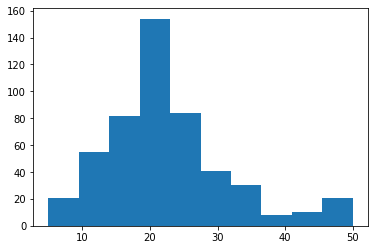

In [94]:
plt.hist(y_target,bins=10)

In [97]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures

# method는 표준 정균 분포 변환(Standard),최대값/최소값 정규화(MinMax),로그변환(log)결정
#p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2이상 부여하지 않음
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
def get_scaled_data(method='None',p_degree=None,input_data=None):
    if method == 'Standard':
        scaled_data=StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data=MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data=np.log1p(input_data)
    else:
        scaled_data =input_data
    
    if p_degree != None:
        scaled_data=PolynomialFeatures(degree=p_degree,
                                       include_bias=False).fit_transform(scaled_data)
    return scaled_data
data = []

def get_linear_reg_eval(method="Ridge", params=[], X_data_n=None, y_target_n=None, verbose=True) :
    sub_data = []
    for param in params :        
        ridge = Ridge(alpha=param)
        neg_mse_scores = cross_val_score(ridge, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5, verbose=verbose)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        print(f"alpha {param}일 때 5 folds의 개별 평균 RMSE : {avg_rmse:.4f}")
        sub_data.append(np.round(avg_rmse,3))
    data.append(sub_data)
    

In [98]:

# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]

# 변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None, None), ("Standard", None), ("Standard", 2),
                ("MinMax", None), ("MinMax", 2), ("Log", None)]

for scale_method in scale_methods :
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print(f"\n## 변환 유형:{scale_method[0]}, Polynomial Degree:{scale_method[1]}")

    # alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고,
    # 회귀 계수값들을 DataFrame으로 반환해주는 함수
    get_linear_reg_eval("Ridge", params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 folds의 개별 평균 RMSE : 5.7885
alpha 1일 때 5 folds의 개별 평균 RMSE : 5.6526
alpha 10일 때 5 folds의 개별 평균 RMSE : 5.5182
alpha 100일 때 5 folds의 개별 평균 RMSE : 5.3296

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 folds의 개별 평균 RMSE : 5.8260
alpha 1일 때 5 folds의 개별 평균 RMSE : 5.8029
alpha 10일 때 5 folds의 개별 평균 RMSE : 5.6368
alpha 100일 때 5 folds의 개별 평균 RMSE : 5.4214

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 folds의 개별 평균 RMSE : 8.8272
alpha 1일 때 5 folds의 개별 평균 RMSE : 6.8713
alpha 10일 때 5 folds의 개별 평균 RMSE : 5.4849
alpha 100일 때 5 folds의 개별 평균 RMSE : 4.6344

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 folds의 개별 평균 RMSE : 5.7636
alpha 1일 때 5 folds의 개별 평균 RMSE : 5.4650
alpha 10일 때 5 folds의 개별 평균 RMSE : 5.7542
alpha 100일 때 5 folds의 개별 평균 RMSE : 7.6349

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 folds의 개별 평균 RMSE : 5.2976
alpha 1일 때 5 folds의 개별 평균 RMSE : 4.3227
alpha 10일 때 5 folds의 개별 평균 RMSE : 5.1852
alpha 100일 때 5 f

In [99]:
result_df = pd.DataFrame(data, columns=[["alpha값", "alpha값", "alpha값", "alpha값"], ["alpha=0.1", "alpha=1", "alpha=10", "alpha=100"]])
result_df["변환유형"] = ["원본데이터", "표준정규분포", "표준정규분포 + 2차 다항식", "최솟값/최댓값 정규화", "최솟값/최댓값 정규화 + 2차 다항식", "로그변환"]
result_df.set_index("변환유형", inplace=True)
result_df

alpha값                           
                     alpha=0.1 alpha=1 alpha=10 alpha=100
변환유형                                                     
원본데이터                    5.788   5.653    5.518     5.330
표준정규분포                   5.826   5.803    5.637     5.421
표준정규분포 + 2차 다항식          8.827   6.871    5.485     4.634
최솟값/최댓값 정규화              5.764   5.465    5.754     7.635
최솟값/최댓값 정규화 + 2차 다항식     5.298   4.323    5.185     6.538
로그변환                     4.770   4.676    4.836     6.241

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [ ]:
# 위스콘신 유방암 데이터 불러오기
cancer= load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler() 로 평균이 0, 분산이 1로 데이터 분포도 변환

scaler=StandardScaler()
data_scaled =scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test=train_test_split(data_scaled,cancer.target,test_size=0.3,random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
lr_clf = LogisticRegression()

lr_clf.fit(X_train,y_train)

lr_preds=lr_clf.predict(X_test)

#accuray와 roc_auc 생성

print('accuracy:{:0.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test,lr_preds)))

accuracy:0.977
roc_auc: 0.972


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'penalty': ['l2', 'l1'], 'C':[0.01, 0.1, 1, 1, 5, 10]}
grid_clf = GridSearchCV(lr_clf, param_grid=params , scoring="accuracy", cv=3)
grid_clf.fit(data_scaled, cancer.target)
best_params = grid_clf.best_params_
best_score = grid_clf.best_score_
print(f"최적 하이퍼 파라미터 :{best_params:}, 최적 평균 정확도: {best_score:.3f}")

최적 하이퍼 파라미터 :{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도: 0.975


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jangd\AppData\Local\Programs\Pyth

In [102]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [115]:
# 보스턴 데이터 세트로드
boston=load_boston()
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [116]:
from sklearn.ensemble import RandomForestRegressor
bostonDF['PRICE']=boston.target
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)

In [117]:
rf=RandomForestRegressor(random_state=0,n_estimators=1000)

In [118]:
neg_mse_scores=cross_val_score(rf,X_data,y_target,scoring='neg_mean_squared_error')
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

In [119]:
print('5 교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scroes : ',np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scroes :  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


In [121]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
import xgboost as xgb

In [130]:
def get_model_cv_prediction(model,X_data,y_target):
    from sklearn.model_selection import train_test_split
    X_train, X_valid, y_train, y_valid = train_test_split(X_data,y_target, test_size=0.3)
    model = xgb.XGBRegressor(n_estimators=300, max_depth=3, learning_rate=0.05, n_jobs=-1)
    model.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], early_stopping_rounds=30, verbose=0)
    neg_mse_scores=cross_val_score(rf,X_valid,y_valid,scoring='neg_mean_squared_error')
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    
    print(avg_rmse)


# def get_model_cv_prediction(model=None, X_data=None, y_target=None) :
#     neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
#     rmse_scores = np.sqrt(-1*neg_mse_scores)
#     avg_rmse = np.mean(rmse_scores)
#     if model == dt_reg :
#         print(f"### DecisionTreeRegressor ### \n5 교차 검증의 평균 RMSE : {np.round(avg_rmse,3)}")
#     elif model == rf_reg :
#         print(f"### RandomForestRegressor ### \n5 교차 검증의 평균 RMSE : {np.round(avg_rmse,3)}")
#     else :
#         print(f"### XGBRegressor ### \n5 교차 검증의 평균 RMSE : {np.round(avg_rmse,3)}")

In [132]:
dt_reg=DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg=RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg=XGBRFRegressor(random_state=0,n_estimators=1000)


# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models=[dt_reg,rf_reg,gb_reg]
for model in models:
    get_model_cv_prediction(model,X_data,y_target)


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


4.049306543743754


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


4.681098296143157


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


3.8247862946001354


<AxesSubplot:>

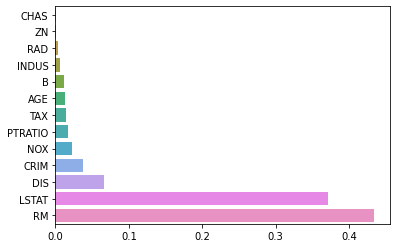

In [135]:
import seaborn as sns
%matplotlib inline

rf_reg=RandomForestRegressor(n_estimators=1000)

# 앞예제에서 만들어진 X_data,y_data 데이터셋을 적용하여 학습합니다.

rf_reg.fit(X_data,y_target)

feature_series=pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series=feature_series.sort_values(ascending=True)
sns.barplot(x=feature_series,y=feature_series.index)
